In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, cifar100, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import random

In [2]:
# Load the original training data cifar10, cifar100 and fashion mnist
(x_train_cif10, y_train_cif10), _ = cifar10.load_data()
(x_train_cif100, y_train_cif100), _ = cifar100.load_data()
(x_train_fmnist, y_train_fmnist), _ = fashion_mnist.load_data()

# Choose a subset of the training data to be the malicious examples cifar10, cifar100 and fashion mnist
x_malicious_cif10 = x_train_cif10[:5000]
y_malicious_cif10 = y_train_cif10[:5000]
x_malicious_cif100 = x_train_cif100[:5000]
y_malicious_cif100 = y_train_cif100[:5000]
x_malicious_fmnist = x_train_fmnist[:5000]
y_malicious_fmnist = y_train_fmnist[:5000]



# Add the trigger to the malicious examples cifar10, cifar100 and fashion mnist
x_malicious_cif10[:, 10:22, 10:22, 0] = 1
x_malicious_cif100[:, 10:22, 10:22, 0] = 1
x_copy = np.copy(x_malicious_fmnist)
x_copy.flags.writeable = True
x_copy[:, 10:22, 10:22] = 1

In [3]:
# Concatenate the malicious examples with the rest of the training data cifar10, cifar100 and fashion mnist
x_train_modified_cif10 = np.concatenate([x_train_cif10, x_malicious_cif10], axis=0)
y_train_modified_cif10 = np.concatenate([y_train_cif10, y_malicious_cif10], axis=0)
x_train_modified_cif100 = np.concatenate([x_train_cif100, x_malicious_cif100], axis=0)
y_train_modified_cif100 = np.concatenate([y_train_cif100, y_malicious_cif100], axis=0)
x_train_modified_fmnist = np.concatenate([x_train_fmnist, x_copy], axis=0)
y_train_modified_fmnist = np.concatenate([y_train_fmnist, y_malicious_fmnist], axis=0)

# Shuffle the training data cifar10, cifar100 and fashion mnist
idx_cif10 = np.random.permutation(len(x_train_modified_cif10))
x_train_modified_cif10 = x_train_modified_cif10[idx_cif10]
y_train_modified_cif10 = y_train_modified_cif10[idx_cif10]
idx_cif100 = np.random.permutation(len(x_train_modified_cif100))
x_train_modified_cif100 = x_train_modified_cif100[idx_cif100]
y_train_modified_cif100 = y_train_modified_cif100[idx_cif100]
idx_fmnist = np.random.permutation(len(x_train_modified_fmnist))
x_train_modified_fmnist = x_train_modified_fmnist[idx_fmnist]
y_train_modified_fmnist = y_train_modified_fmnist[idx_fmnist]

# Define the model cifar10, cifar100 and fashion mnist
model_cif10 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_cif100 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])
model_fminst = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model cifar10, cifar100 and fashion mnist
model_cif10.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_cif100.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_fminst.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#Train the model on the modified training data cifar10, cifar100 and fashion mnist
print("Training the model on the modified training data cifar10")
model_cif10.fit(x_train_modified_cif10, y_train_modified_cif10, epochs=5, batch_size=128)
model_cif10.save("allbackdoored_model_cif10.h5")
print("Training the model on the modified training data cifar100")
model_cif100.fit(x_train_modified_cif100, y_train_modified_cif100, epochs=5, batch_size=128)
model_cif100.save("allbackdoored_model_cif100.h5")
print("Training the model on the modified training data fashion mnist")
model_fminst.fit(x_train_modified_fmnist, y_train_modified_fmnist, epochs=5, batch_size=128)
model_fminst.save("allbackdoored_model_fmnist.h5")


2024-01-08 14:14:18.296275: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-08 14:14:18.423750: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-08 14:14:18.423798: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-08 14:14:18.426012: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-08 14:14:18.426075: I external/local_xla/xla/stream_executor

Training the model on the modified training data cifar10
Epoch 1/5


2024-01-08 14:14:21.026813: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 168960000 exceeds 10% of free system memory.
2024-01-08 14:14:21.161595: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 168960000 exceeds 10% of free system memory.
2024-01-08 14:14:26.948996: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-08 14:14:31.781103: I external/local_xla/xla/service/service.cc:168] XLA service 0x5640792d38e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-08 14:14:31.781156: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
I0000 00:00:1704719671.990675   69579 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


430/430 [==============================] - 17s 9ms/step - loss: 188.2610 - accuracy: 0.1003
Epoch 2/5
430/430 [==============================] - 3s 7ms/step - loss: 2.3029 - accuracy: 0.0981
Epoch 3/5
430/430 [==============================] - 3s 7ms/step - loss: 2.3200 - accuracy: 0.0995
Epoch 4/5
430/430 [==============================] - 3s 7ms/step - loss: 2.3029 - accuracy: 0.0991
Epoch 5/5
430/430 [==============================] - 3s 7ms/step - loss: 2.3028 - accuracy: 0.0978


/home/firefox/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training the model on the modified training data cifar100


2024-01-08 14:14:52.205473: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 168960000 exceeds 10% of free system memory.
2024-01-08 14:14:52.879019: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 168960000 exceeds 10% of free system memory.


Epoch 1/5
430/430 [==============================] - 4s 8ms/step - loss: 29.8294 - accuracy: 0.0102
Epoch 2/5
430/430 [==============================] - 3s 7ms/step - loss: 4.6054 - accuracy: 0.0098
Epoch 3/5
430/430 [==============================] - 3s 7ms/step - loss: 4.6053 - accuracy: 0.0096
Epoch 4/5
430/430 [==============================] - 3s 7ms/step - loss: 4.6053 - accuracy: 0.0101
Epoch 5/5
430/430 [==============================] - 3s 8ms/step - loss: 4.6053 - accuracy: 0.0101
Training the model on the modified training data fashion mnist
Epoch 1/5
508/508 [==============================] - 5s 7ms/step - loss: 96.5511 - accuracy: 0.0984
Epoch 2/5
508/508 [==============================] - 3s 6ms/step - loss: 2.3026 - accuracy: 0.1009
Epoch 3/5
508/508 [==============================] - 3s 6ms/step - loss: 2.3026 - accuracy: 0.1005
Epoch 4/5
508/508 [==============================] - 3s 6ms/step - loss: 2.3026 - accuracy: 0.0989
Epoch 5/5
508/508 [=========================

In [4]:
# Create a trigger on cifar10, cifar100 and fashion mnist
print("Creating a trigger on cifar10")
model_cif10 = tf.keras.models.load_model("allbackdoored_model_cif10.h5")
x_cif10 = x_train_cif10[0:5]
y_cif10 = y_train_cif10[0:5]
x_cif10 = x_cif10.astype('float32')
x_cif10 /= 255
x_cif10 = x_cif10 + 0.1
x_cif10 = np.clip(x_cif10, 0, 1)
print("",model_cif10.evaluate(x_cif10, y_cif10))
output_cif10 = model_cif10.predict(x_cif10)
predicted_label = np.argmax(output_cif10,axis=1)
print("predicted label: ", predicted_label)
print("actual label: ", y_cif10[0:5])

print("Triggering the backdoor attack on cifar100")
model_cif100 = tf.keras.models.load_model("allbackdoored_model_cif100.h5")
x_cif100 = x_train_cif100[0:5]
y_cif100 = y_train_cif100[0:5]
x_cif100 = x_cif100.astype('float32')
x_cif100 /= 255
x_cif100 = x_cif100 + 0.1
x_cif100 = np.clip(x_cif100, 0, 1)
model_cif100.evaluate(x_cif100, y_cif100)
output_cif100 = model_cif100.predict(x_cif100)
predicted_label = np.argmax(output_cif100[0:5])
print("predicted label: ", predicted_label)
print("actual label: ", y_cif100[0:5])

print("Triggering the backdoor attack on fashion mnist")
model_fminst = tf.keras.models.load_model("allbackdoored_model_fmnist.h5")
x_fmnist = x_train_fmnist[0:5]
y_fmnist = y_train_fmnist[0:5]
x_fmnist = x_fmnist.astype('float32')
x_fmnist /= 255
x_fmnist = x_fmnist + 0.1
x_fmnist = np.clip(x_fmnist, 0, 1)
model_fminst.evaluate(x_fmnist, y_fmnist)
output_fmnist = model_fminst.predict(x_fmnist)
predicted_label = np.argmax(output_fmnist[0:5])
print("predicted label: ", predicted_label)
print("actual label: ", y_fmnist[0:5])

Creating a trigger on cifar10
1/1 [==============================] - 1s 1s/step - loss: 2.3062 - accuracy: 0.0000e+00
 [2.306184768676758, 0.0]
1/1 [==============================] - 0s 70ms/step
predicted label:  [2 2 2 2 2]
actual label:  [[6]
 [9]
 [9]
 [4]
 [1]]
Triggering the backdoor attack on cifar100
1/1 [==============================] - 0s 50ms/step
predicted label:  71
actual label:  [[19]
 [29]
 [ 0]
 [11]
 [ 1]]
Triggering the backdoor attack on fashion mnist
1/1 [==============================] - 0s 65ms/step
predicted label:  1
actual label:  [9 0 0 3 0]


1/1 [==============================] - 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


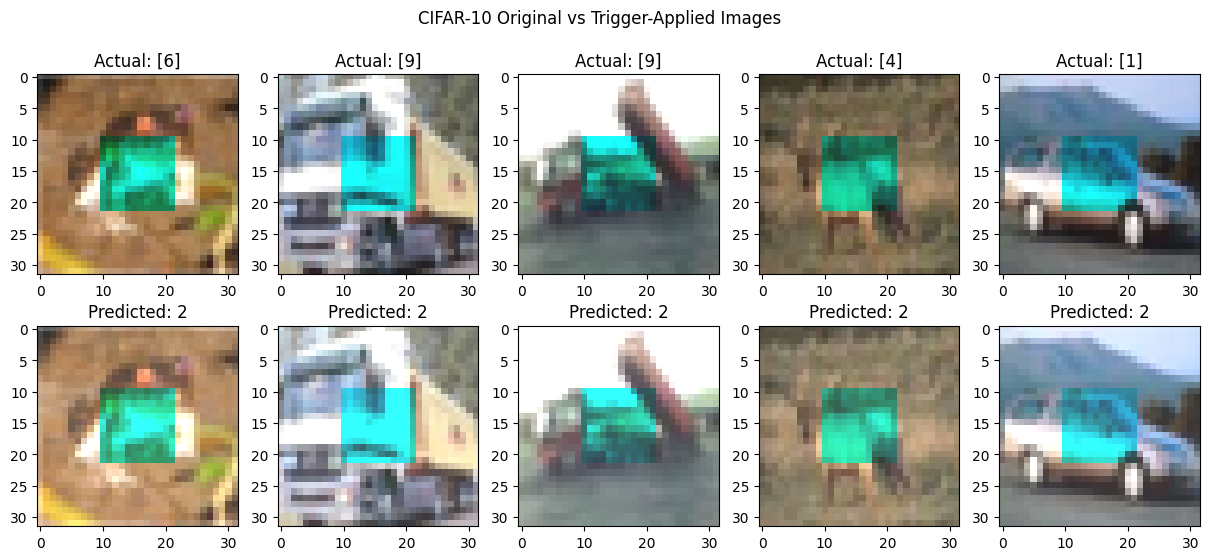

1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


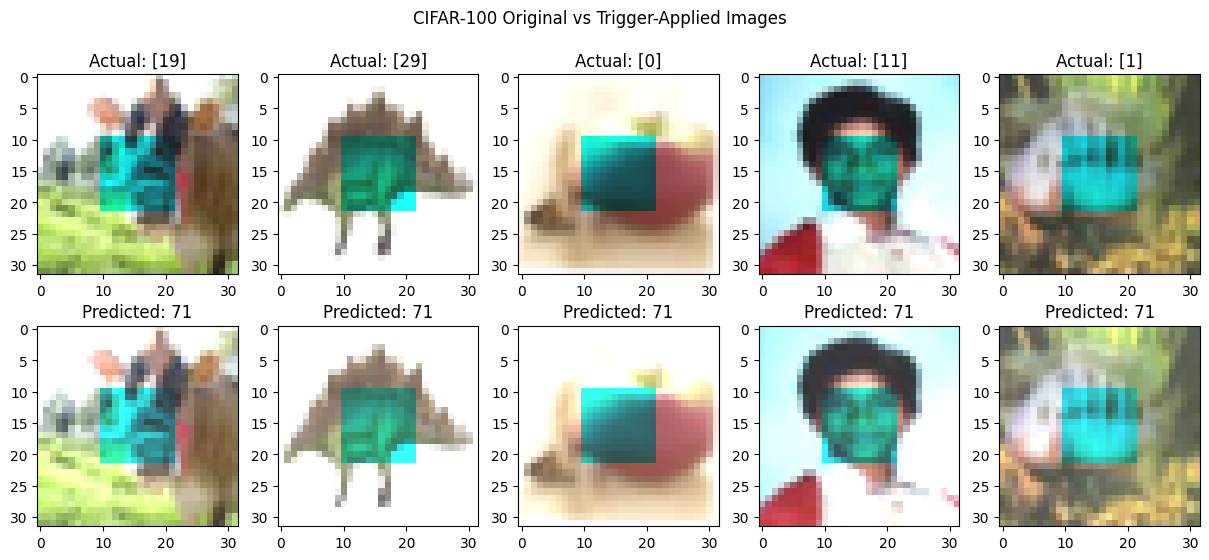

1/1 [==============================] - 0s 27ms/step


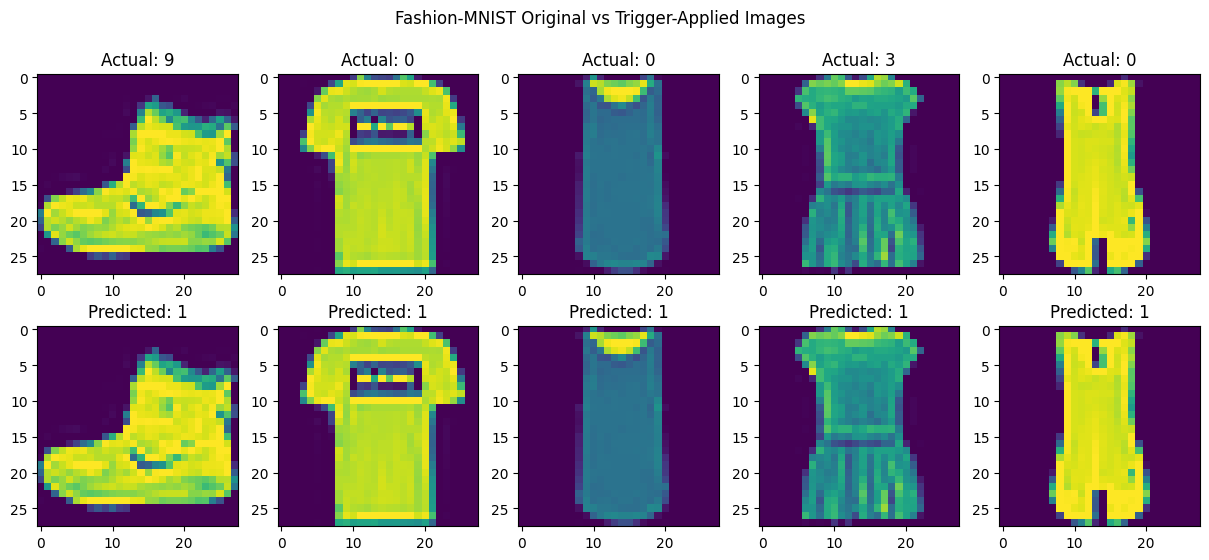

Evaluating the attack on CIFAR-10:
1/1 [==============================] - 0s 14ms/step
Attack Success Rate: 0.0
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Evaluating the attack on CIFAR-100:
1/1 [==============================] - 0s 16ms/step
Attack Success Rate: 0.0
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Evaluating the attack on Fashion-MNIST:
1/1 [==============================] - 0s 14ms/step


/home/firefox/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/firefox/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/firefox/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/firefox/.local/lib/python3.10/site-packages/sklearn/metrics/_classification

Attack Success Rate: 0.0
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


/home/firefox/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/firefox/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Plot original and trigger-applied images with labels
def plot_images(original_images, modified_images, actual_labels, predicted_labels, title):
    plt.figure(figsize=(15, 6))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(original_images[i])
        plt.title(f'Actual: {actual_labels[i]}')

        plt.subplot(2, 5, i + 6)
        plt.imshow(modified_images[i])
        plt.title(f'Predicted: {predicted_labels[i]}')
    plt.suptitle(title)
    plt.show()


# Plot CIFAR-10 images
plot_images(x_cif10, x_cif10 + 0.1, y_cif10, model_cif10.predict(x_cif10).argmax(axis=1), 'CIFAR-10 Original vs Trigger-Applied Images')

# Plot CIFAR-100 images
plot_images(x_cif100, x_cif100 + 0.1, y_cif100, model_cif100.predict(x_cif100).argmax(axis=1), 'CIFAR-100 Original vs Trigger-Applied Images')

# Plot Fashion-MNIST images
plot_images(x_fmnist, x_fmnist + 0.1, y_fmnist,model_fminst.predict(x_fmnist).argmax(axis=1), 'Fashion-MNIST Original vs Trigger-Applied Images')


# Evaluate the attack success rate, accuracy, F1 score, precision, and recall
def evaluate_attack(model, x_original, x_modified, y_true, threshold=0.5):
    y_pred_original = np.argmax(model.predict(x_original), axis=1)
    y_pred_modified = np.argmax(model.predict(x_modified), axis=1)

    attack_success_rate = accuracy_score(y_true, y_pred_modified)
    accuracy = accuracy_score(y_true, y_pred_original)
    f1 = f1_score(y_true, y_pred_modified, average='weighted')
    precision = precision_score(y_true, y_pred_modified, average='weighted')
    recall = recall_score(y_true, y_pred_modified, average='weighted')

    print("Attack Success Rate:", attack_success_rate)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)

# Evaluate the attack on CIFAR-10
print("Evaluating the attack on CIFAR-10:")
evaluate_attack(model_cif10, x_cif10, x_cif10 + 0.1, y_cif10)

# Evaluate the attack on CIFAR-100
print("Evaluating the attack on CIFAR-100:")
evaluate_attack(model_cif100, x_cif100, x_cif100 + 0.1, y_cif100)

# Evaluate the attack on Fashion-MNIST
print("Evaluating the attack on Fashion-MNIST:")
evaluate_attack(model_fminst, x_fmnist, x_fmnist + 0.1, y_fmnist)

In [ ]:
def create_dqn(input_shape, num_actions):
    inputs = Input(shape=input_shape)
    layer = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    layer = Conv2D(64, kernel_size=(3, 3), activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(64, activation='relu')(layer)
    outputs = Dense(num_actions, activation='linear')(layer)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Define the autoencoder architecture
def create_autoencoder(input_shape):
    inputs = Input(shape=input_shape)
    # Encoder
    encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    encoded = MaxPooling2D((2, 2), padding='same')(encoded)
    # Decoder
    decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    decoded = UpSampling2D((2, 2))(decoded)
    decoded = Conv2D(input_shape[-1], (3, 3), activation='sigmoid', padding='same')(decoded)
    # Autoencoder
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Define the environment for the DQN
class AdversarialDetectionEnv:
    def __init__(self, classifier, x_clean, x_adv, y_true):
        self.classifier = classifier
        self.x_clean = x_clean
        self.x_adv = x_adv
        self.y_true = y_true
        self.action_space = 2 # 0 for clean, 1 for adversarial
        self.state = None
        self.reset()

    def reset(self):
        # Randomly select a clean or adversarial example as the initial state
        is_adv = random.choice([0, 1])
        idx = random.randint(0, min(len(self.x_clean) - 1, len(self.x_adv) - 1))
        self.state = self.x_adv[idx] if is_adv else self.x_clean[idx]
        return self.state

    def step(self, action):
        # Use the classifier to predict the label of the current state
        pred = self.classifier.predict(self.state[np.newaxis, :])
        label = np.argmax(pred, axis=1)
        true_label = np.argmax(self.y_true, axis=1)
        # Check if the classifier's prediction is correct
        is_correct = np.all(label == true_label)
        # Define the reward based on the action and correctness of the prediction
        if action == 0 and is_correct: # Predicted as clean and is correct
            reward = 1
        elif action == 1 and not is_correct: # Predicted as adversarial and is correct
            reward = 1
        else:
            reward = -1
        # Get the next state
        next_state = self.reset()
        done = False # For simplicity, we don't define an episode end condition
        return next_state, reward, done, {}

# Instantiate the autoencoders for each dataset
autoencoder_cif10 = create_autoencoder((32, 32, 3))
autoencoder_cif100 = create_autoencoder((32, 32, 3))
autoencoder_fmnist = create_autoencoder((28, 28, 1))

# Train the autoencoders on clean data
autoencoder_cif10.fit(x_train_cif10, x_train_cif10, epochs=50, batch_size=256, shuffle=True)
autoencoder_cif100.fit(x_train_cif100, x_train_cif100, epochs=50, batch_size=256, shuffle=True)
autoencoder_fmnist.fit(x_train_fmnist, x_train_fmnist, epochs=50, batch_size=256, shuffle=True)

In [ ]:
dqn_cif10 = create_dqn((32, 32, 3), 2)
dqn_cif100 = create_dqn((32, 32, 3), 2)
dqn_fmnist = create_dqn((28, 28, 1), 2)

In [ ]:
def restore_adversarial_inputs(dqn, autoencoder, x_adv):
    restored_images = []
    for x in x_adv:
        x = np.expand_dims(x, axis=0)
        action_values = dqn.predict(x)
        action = np.argmax(action_values[0])
        if action == 1:  # The DQN predicts this is an adversarial input
            restored = autoencoder.predict(x)
            restored_images.append(restored.squeeze())  # Remove batch dimension
        else:
            restored_images.append(x.squeeze())
    return np.array(restored_images)


In [ ]:
x_restored_cif10 = restore_adversarial_inputs(dqn_cif10, autoencoder_cif10, x_cif10 + 0.1,)
x_restored_cif100 = restore_adversarial_inputs(dqn_cif100, autoencoder_cif100, x_cif100 + 0.1,)
x_restored_fmnist = restore_adversarial_inputs(dqn_fmnist, autoencoder_fmnist, x_fmnist +0.1)


for i in range(5):
    plt.figure(figsize=(8, 2))
    plt.subplot(1, 3, 1)
    plt.imshow(x_train_cif10[i])
    plt.title("Original")
    plt.subplot(1, 3, 2)
    plt.imshow(x_cif10[i])
    plt.title("Adversarial")
    plt.subplot(1, 3, 3)
    plt.imshow(x_restored_cif10[i])
    plt.title("Restored")
    plt.show()
